In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")


In [8]:
df = pd.read_csv("../datasets/raw/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
missing_percentage = df.isnull().mean()*100
print(missing_percentage)

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [13]:
categorical_cols = df.select_dtypes(include = ["object"]).columns.tolist()
print(categorical_cols)

['Genre']


In [14]:
numerical_cols = df.select_dtypes(include = ["int64","float64"]).columns.tolist()
print(numerical_cols)

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [15]:
df = df.drop('CustomerID',axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


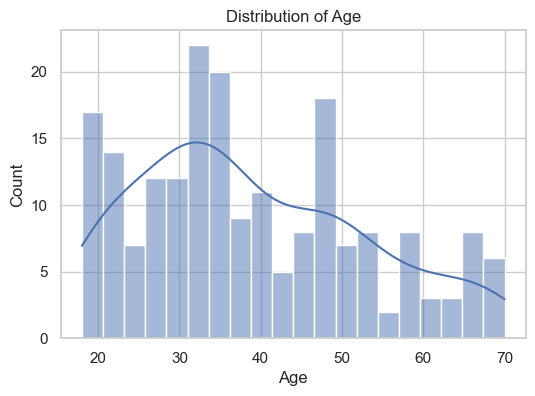

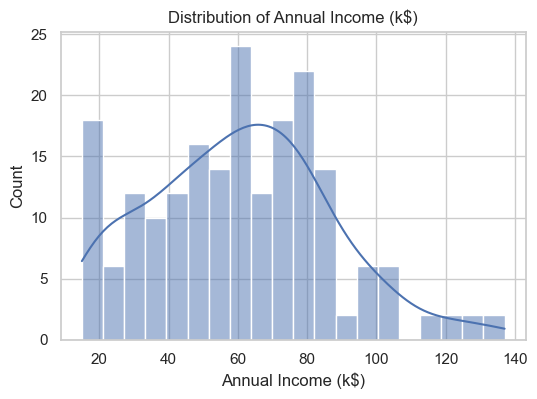

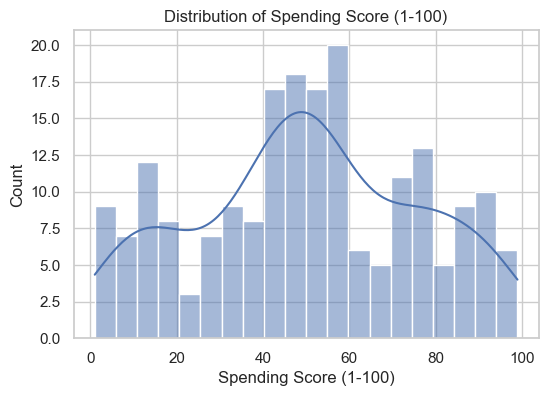

In [22]:
for cols in numerical_cols:
    if cols != "CustomerID":
        plt.figure(figsize=(6,4))
        sns.histplot(df[cols],kde=True, bins=20)
        plt.title(f"Distribution of {cols}")
        plt.show()

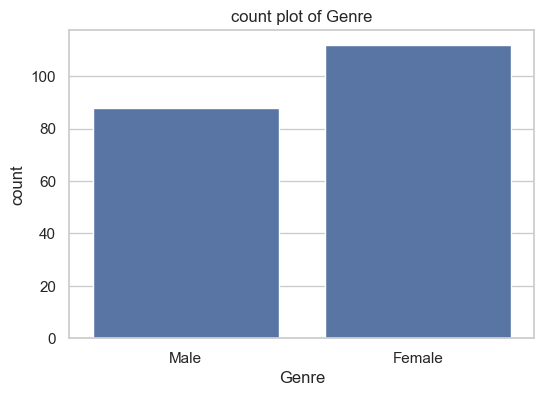

In [23]:
for cols in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cols,data=df)
    plt.title(f"count plot of {cols}")
    plt.show()

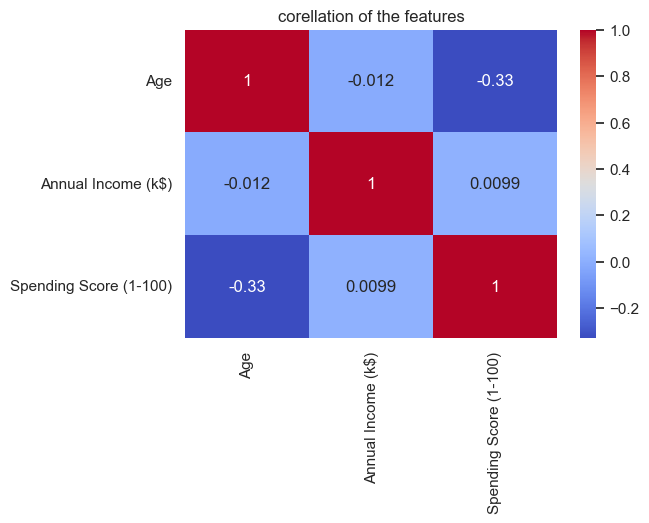

In [27]:
num_df = df.select_dtypes(include = ["int64","float64"])
plt.figure(figsize = (6,4))
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm")
plt.title("corellation of the features")
plt.show()